PROJETO:

1) freight_costs: Subset de cotações com origem no estado do Mato Grosso para múltiplos destinos.
2) distances.csv: Contém um subset de distâncias com origem no estado do Mato Grosso para todos os demais municípios do Brasil.

In [5]:
# Importação de bibliotecas.
import pandas as pd

Análise dos dados

In [2]:
df_freight_costs = pd.read_csv('csv_files/freight_costs.csv',
                               delimiter=';',
                               decimal=',')
df_distances = pd.read_csv('csv_files/distances.csv',
                               delimiter=';',
                               decimal=',')

Analisando estrutura dos dados.

In [3]:
print("Primeiros 10 custos de frete:")
print(df_freight_costs)

print("Primeiras 10 distâncias:")
print(df_freight_costs)

Primeiros 10 custos de frete:
     dt_reference  id_city_origin  id_city_destination  freight_cost
0      07/01/2022       5107602.0            4118204.0        270.00
1      21/01/2022       5107602.0            4118204.0        300.00
2      11/02/2022       5107602.0            4118204.0        290.00
3      18/02/2022       5107602.0            4118204.0        280.00
4      25/02/2022       5107602.0            4118204.0        305.00
...           ...             ...                  ...           ...
1263   17/05/2024       5103353.0            1501303.0        275.17
1264   21/06/2024       5103353.0            1501303.0        288.70
1265   28/06/2024       5103353.0            1501303.0        296.70
1266   05/07/2024       5103353.0            1501303.0        291.80
1267   12/07/2024       5103353.0            1501303.0        332.30

[1268 rows x 4 columns]
Primeiras 10 distâncias:
     dt_reference  id_city_origin  id_city_destination  freight_cost
0      07/01/2022      

In [4]:
print(f'Dados nulos de frete: {df_freight_costs.isna().sum()}')
print(f'Dados nulos de distância: {df_distances.isna().sum()}')

Dados nulos de frete: dt_reference           0
id_city_origin         0
id_city_destination    0
freight_cost           0
dtype: int64
Dados nulos de distância: id_city_origin            0
id_city_destination       0
distance               9165
dtype: int64


In [5]:
df_distances[df_distances['distance'].isna()]

,id_city_origin,id_city_destination,distance
5922,5100102,1502806,NaN
5923,5100201,1502806,NaN
5924,5100250,1502806,NaN
5925,5100300,1502806,NaN
5926,5100359,1502806,NaN
...,...,...,...
780289,5101407,1502509,NaN
780290,5101605,1502509,NaN
780291,5101704,1502509,NaN
780292,5101803,1502509,NaN


Foi possível determinar que precisa-se retirar os dados nulos de distância.

In [6]:
df_distances.dropna(inplace=True)

In [7]:
df_freight_costs

,dt_reference,id_city_origin,id_city_destination,freight_cost
0,07/01/2022,5107602.0,4118204.0,270.00
1,21/01/2022,5107602.0,4118204.0,300.00
2,11/02/2022,5107602.0,4118204.0,290.00
3,18/02/2022,5107602.0,4118204.0,280.00
4,25/02/2022,5107602.0,4118204.0,305.00
...,...,...,...,...
1263,17/05/2024,5103353.0,1501303.0,275.17
1264,21/06/2024,5103353.0,1501303.0,288.70
1265,28/06/2024,5103353.0,1501303.0,296.70
1266,05/07/2024,5103353.0,1501303.0,291.80


In [8]:
# Unindo as bases de cotações e distâncias
df_freight_costs_distances = pd.merge(df_freight_costs, df_distances, on=['id_city_origin', 'id_city_destination'])

In [9]:
df_freight_costs_distances

,dt_reference,id_city_origin,id_city_destination,freight_cost,distance
0,07/01/2022,5107602.0,4118204.0,270.00,1578.91
1,21/01/2022,5107602.0,4118204.0,300.00,1578.91
2,11/02/2022,5107602.0,4118204.0,290.00,1578.91
3,18/02/2022,5107602.0,4118204.0,280.00,1578.91
4,25/02/2022,5107602.0,4118204.0,305.00,1578.91
...,...,...,...,...,...
1263,17/05/2024,5103353.0,1501303.0,275.17,1262.43
1264,21/06/2024,5103353.0,1501303.0,288.70,1262.43
1265,28/06/2024,5103353.0,1501303.0,296.70,1262.43
1266,05/07/2024,5103353.0,1501303.0,291.80,1262.43


Output 1

In [10]:
# Lista de destinos especificados
destinations = [1501303.0, 1506807.0, 3205309.0, 3548500.0, 4118204.0, 4207304.0, 4216206.0, 4315602.0]

# Filtrando as cotações para os destinos especificados
df_freight_costs_distances = df_freight_costs_distances[df_freight_costs_distances['id_city_destination'].isin(destinations)]

In [11]:
df_freight_costs_distances.to_csv('outputs/filtered_freight_costs.csv')

In [12]:
df_freight_costs_distances

,dt_reference,id_city_origin,id_city_destination,freight_cost,distance
0,07/01/2022,5107602.0,4118204.0,270.00,1578.91
1,21/01/2022,5107602.0,4118204.0,300.00,1578.91
2,11/02/2022,5107602.0,4118204.0,290.00,1578.91
3,18/02/2022,5107602.0,4118204.0,280.00,1578.91
4,25/02/2022,5107602.0,4118204.0,305.00,1578.91
...,...,...,...,...,...
1263,17/05/2024,5103353.0,1501303.0,275.17,1262.43
1264,21/06/2024,5103353.0,1501303.0,288.70,1262.43
1265,28/06/2024,5103353.0,1501303.0,296.70,1262.43
1266,05/07/2024,5103353.0,1501303.0,291.80,1262.43


Output 2

Importações

In [13]:
import plotly.express as px

c:\Users\felipe.rosa\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\felipe.rosa\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Análise dos dados

In [14]:
df_freight_costs_distances['dt_reference'] = pd.to_datetime(df_freight_costs_distances['dt_reference'], format='%d/%m/%Y')
df_freight_costs_distances[['id_city_origin','id_city_destination']] = df_freight_costs_distances[['id_city_origin','id_city_destination']].astype(str)

In [15]:
# Criação do gráfico 3D.
fig = px.scatter_3d(df_freight_costs_distances, x='distance', y='freight_cost', z='dt_reference',
                    color='id_city_origin', symbol='id_city_destination',
                    labels={'distance': 'Distância (km)', 'freight_cost': 'Custo (Reais)', 'dt_reference': 'Data'},
                    title='Custo do frete em relação ao tempo e distância')

# Exibindo o gráfico.
fig.write_html("images/freight_costs_3d_plot.html")

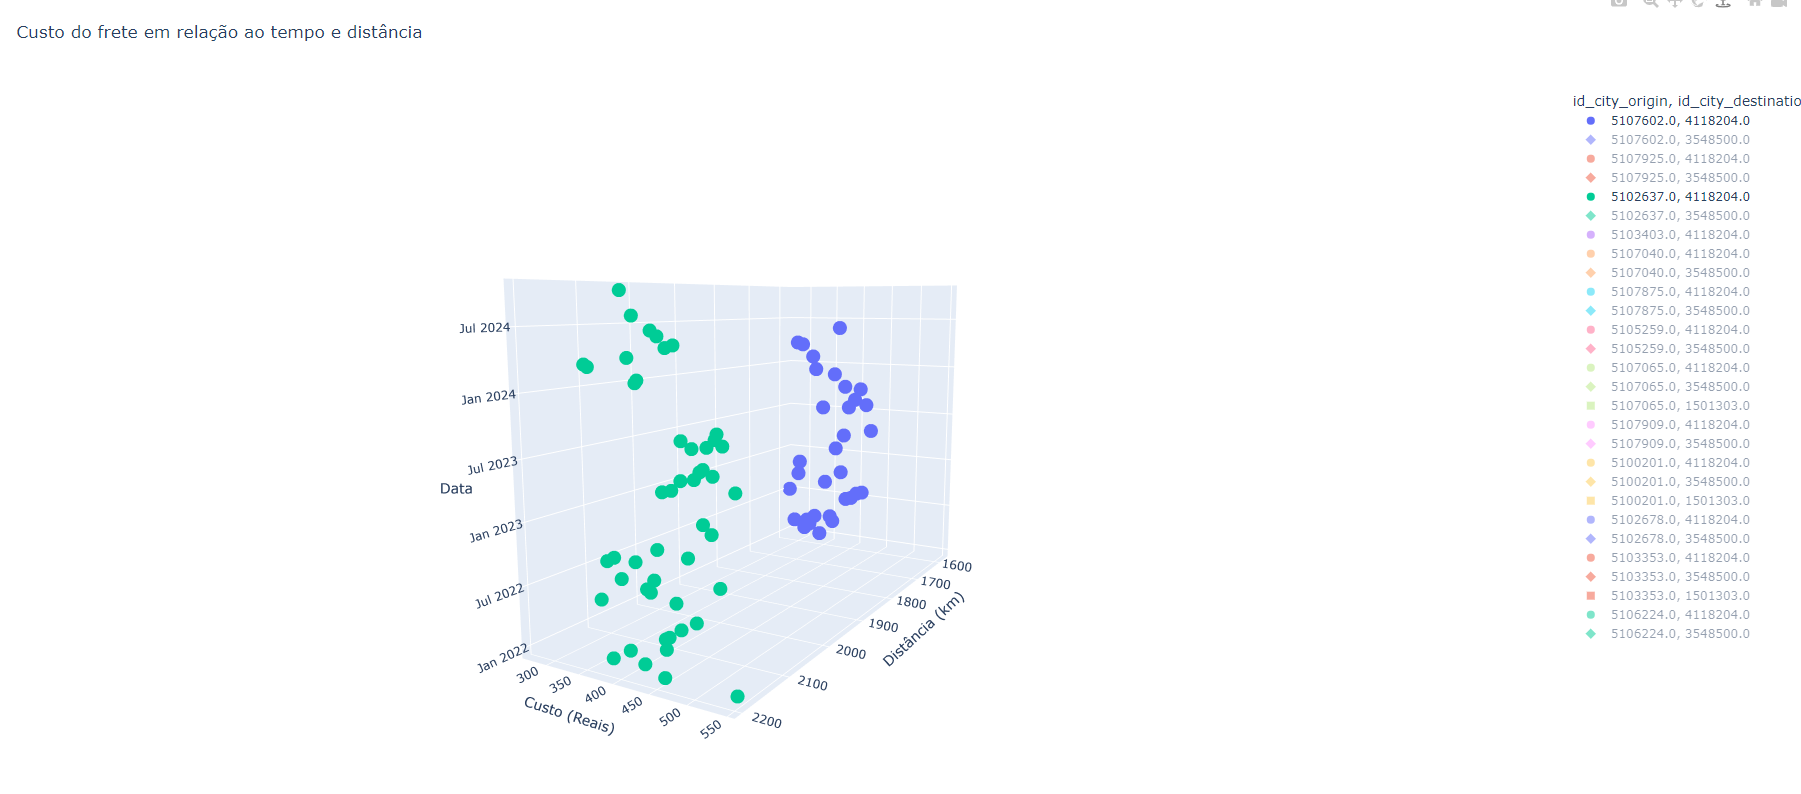

In [16]:
# Visualizando os dados, é possível percever a sazonalidade, com o pico do preço em julho e os preços baixos em janeiro.
fig = px.scatter(df_freight_costs_distances, x="dt_reference", y="freight_cost", color="id_city_origin", symbol='id_city_destination')
fig.show()

In [17]:
# Dataframe de teste e validação do modelo a ser aplicado para predição dos valores.
df_test = df_freight_costs_distances[
    (df_freight_costs_distances['id_city_origin'] == '5107602.0') & 
    (df_freight_costs_distances['id_city_destination'] == '4118204.0')]

In [25]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [21]:
df_test.set_index('dt_reference', inplace=True)

[0]	validation_0-rmse:38.87634
[1]	validation_0-rmse:37.50156
[2]	validation_0-rmse:37.54208
[3]	validation_0-rmse:35.97680
[4]	validation_0-rmse:35.86892
[5]	validation_0-rmse:34.90486
[6]	validation_0-rmse:35.43773
[7]	validation_0-rmse:35.47742
[8]	validation_0-rmse:35.51234
[9]	validation_0-rmse:36.06920
[10]	validation_0-rmse:36.20881
[11]	validation_0-rmse:36.61069
[12]	validation_0-rmse:36.97427
[13]	validation_0-rmse:37.31678
[14]	validation_0-rmse:37.64837
[15]	validation_0-rmse:37.92913
[16]	validation_0-rmse:38.14466
[17]	validation_0-rmse:38.32238
[18]	validation_0-rmse:38.33427
[19]	validation_0-rmse:38.34427
[20]	validation_0-rmse:38.44628
[21]	validation_0-rmse:38.54041
[22]	validation_0-rmse:38.62068
[23]	validation_0-rmse:38.68974
[24]	validation_0-rmse:38.74933
[25]	validation_0-rmse:38.79765
[26]	validation_0-rmse:38.82959
[27]	validation_0-rmse:38.87792
[28]	validation_0-rmse:38.91294
[29]	validation_0-rmse:38.95277
[30]	validation_0-rmse:38.97632
[31]	validation_0-

C:\Users\felipe.rosa\AppData\Local\Temp\ipykernel_8200\4238926145.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\felipe.rosa\AppData\Local\Temp\ipykernel_8200\4238926145.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\felipe.rosa\AppData\Local\Temp\ipykernel_8200\4238926145.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

[92]	validation_0-rmse:39.09759
[93]	validation_0-rmse:39.09759
[94]	validation_0-rmse:39.09759
[95]	validation_0-rmse:39.09759
[96]	validation_0-rmse:39.09759
[97]	validation_0-rmse:39.09759
[98]	validation_0-rmse:39.09759
[99]	validation_0-rmse:39.09759


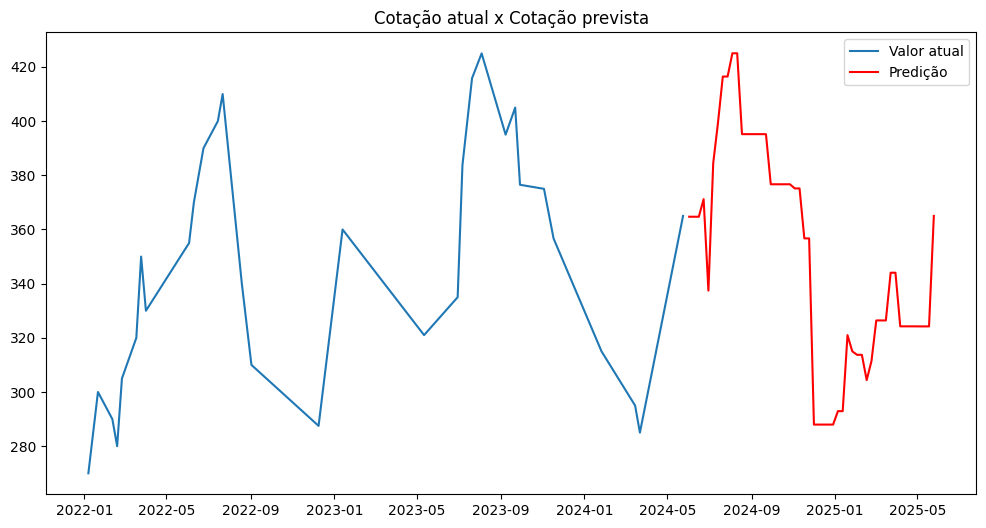

In [34]:
# Criar características de data
df_test['year'] = df_test.index.year
df_test['month'] = df_test.index.month
df_test['week'] = df_test.index.isocalendar().week
df_test['day'] = df_test.index.dayofweek

# Variáveis de entrada e saída
X = df_test[['year', 'month', 'week', 'day']]
y = df_test['freight_cost']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo XGBoost
model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse'
)

# Ajustar o modelo
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Fazer previsões para o conjunto de teste
y_pred = model.predict(X_test)

# Criar um DataFrame para armazenar previsões futuras
future_dates = pd.date_range(start=df_test.index[-1] + pd.Timedelta(weeks=1), periods=52, freq='W')
future_df = pd.DataFrame({
    'year': future_dates.year,
    'month': future_dates.month,
    'week': future_dates.isocalendar().week,
    'day': future_dates.dayofweek
}, index=future_dates)

# Fazer previsões para as próximas 36 semanas
future_forecast = model.predict(future_df)

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['freight_cost'], label='Valor atual')
plt.plot(future_dates, future_forecast, label='Predição', color='red')
plt.legend()
plt.title('Cotação atual x Cotação prevista')
plt.show()